In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

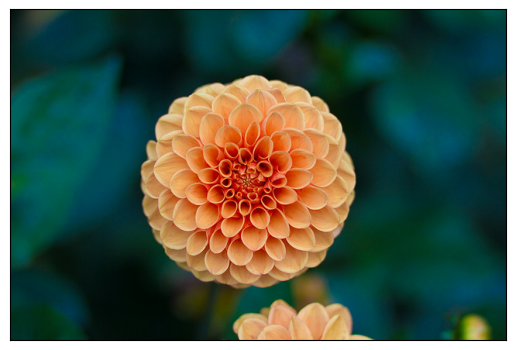

In [25]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[],yticks =[])
ax.imshow(flower)

In [43]:
flower.shape

(427, 640, 3)

In [53]:
data = flower/255
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [165]:
colors = data
rng = np.random.RandomState(0) 
i = rng.permutation(data.shape[0])[:10000]
colors = colors[i]
colors

array([[0.91764706, 0.77647059, 0.57254902],
       [0.        , 0.03921569, 0.01568627],
       [0.92941176, 0.56470588, 0.29019608],
       ...,
       [0.00392157, 0.16078431, 0.15686275],
       [0.01568627, 0.16862745, 0.19607843],
       [0.04705882, 0.09411765, 0.03921569]])

In [203]:
def plot_pixels(data,title,colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0) 
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G,B =data[i].T

    fig , ax = plt.subplots(1,2,figsize = (16,6))
    ax[0].scatter(R, G, color = colors,marker = '.')
    ax[0].set(xlabel = 'Red',ylabel = 'Green',xlim=(0,1),ylim= (0,1))

    ax[1].scatter(R,B,color=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title,size=20);
        

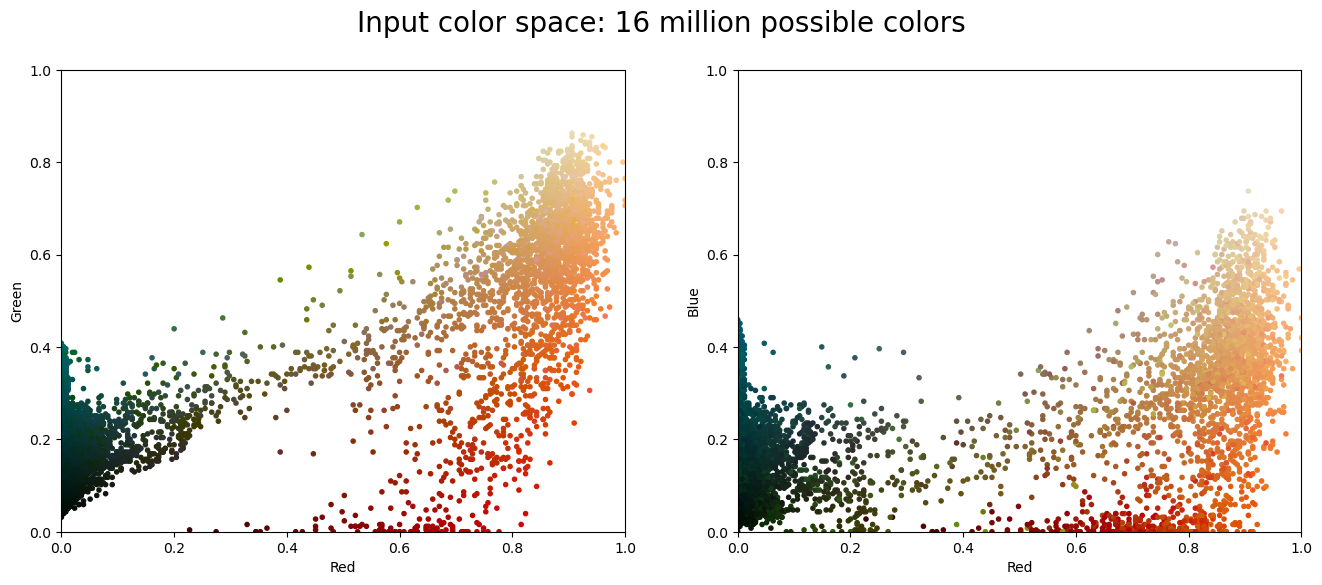

In [205]:
plot_pixels(data,title = 'Input color space: 16 million possible colors')

C:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


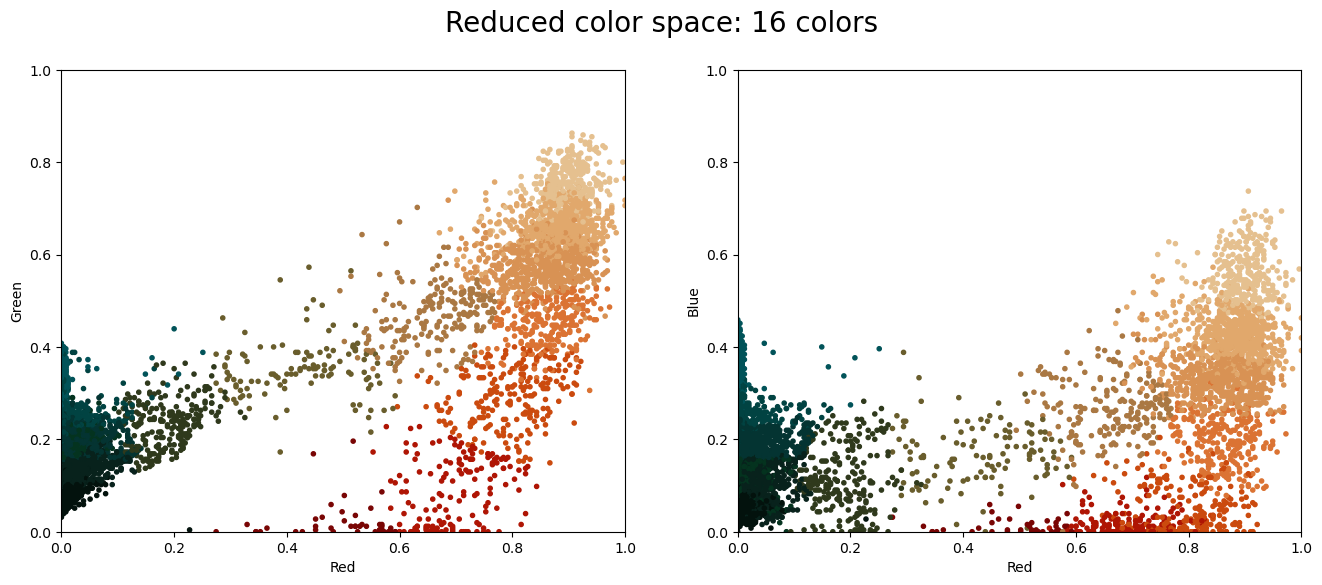

In [259]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data,colors = new_colors, title = 'Reduced color space: 16 colors')

Text(0.5, 1.0, '16-color Image')

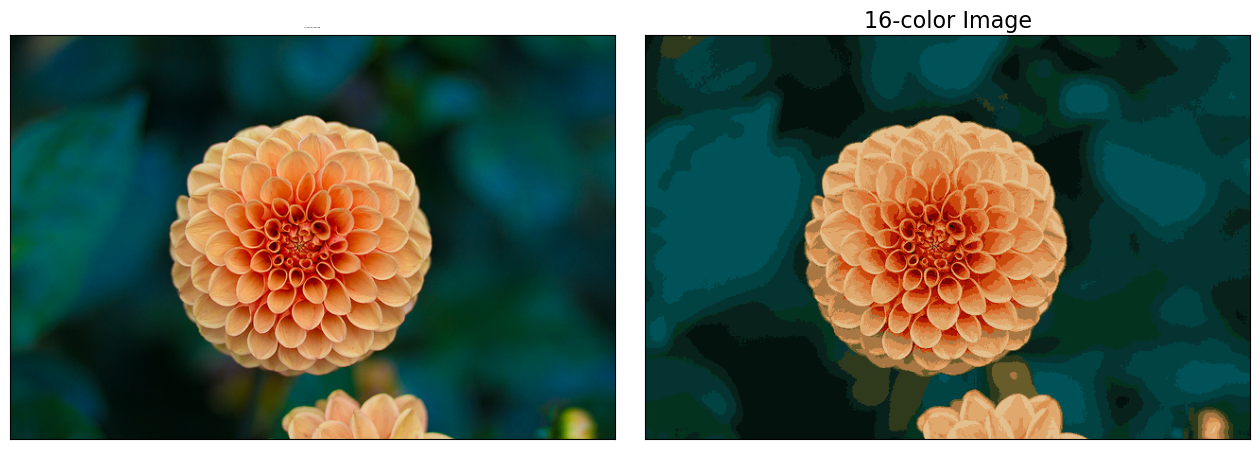

In [289]:
flower_recolored = new_colors.reshape(flower.shape)
fig, ax = plt.subplots(1,2,figsize=(16,6), subplot_kw =dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace =0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size = 1.6)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size= 16)